# Beam Shape Analysis - Tapered Fibre, Full Radial Analysis

### What does this notebook do?

Experimental analysis
- Import Gaussian beamshape data and z values through pandas to np arrays
- Translate and transform Gaussians to reduce fitting parameters 
- Fit the beamshape Gaussians to a one parameter fit to find their waists, w
- Plot ws vs zsin(theta) and fit to (Two/ three parameter?) Fit
- Key: what is z0 and w0 experimentally for the fibre?

Theoretical Analysis
- Takes in wavelength, NA, core radius to calculate V number
- Use marcuse relation to find minumum waist
- Comparison?

## Import all useful libraries / tools

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from os import listdir
import scipy

from lvl4_functions import *

## Import Data

In [2]:
# Define useful path to data
globalpath = "C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Red-Data/"

In [3]:
# Import data
distances, amplitudes = import_data(globalpath)

['DL_01.csv', 'DL_02.csv', 'DL_03.csv', 'DL_04.csv', 'DL_05.csv', 'DL_06.csv', 'DL_07.csv', 'DL_08.csv', 'DL_09.csv', 'DL_10.csv', 'DL_11.csv', 'DL_12.csv', 'DL_13.csv', 'DL_14.csv', 'DL_15.csv', 'DL_16.csv', 'DL_17.csv', 'DL_18.csv', 'DL_19.csv', 'DL_20.csv', 'DR_01.csv', 'DR_02.csv', 'DR_03.csv', 'DR_04.csv', 'DR_05.csv', 'DR_06.csv', 'DR_07.csv', 'DR_08.csv', 'DR_09.csv', 'DR_10.csv', 'DR_11.csv', 'DR_12.csv', 'DR_13.csv', 'DR_14.csv', 'DR_15.csv', 'DR_16.csv', 'DR_17.csv', 'DR_18.csv', 'DR_19.csv', 'DR_20.csv', 'H_01.csv', 'H_02.csv', 'H_03.csv', 'H_04.csv', 'H_05.csv', 'H_06.csv', 'H_07.csv', 'H_08.csv', 'H_09.csv', 'H_10.csv', 'H_11.csv', 'H_12.csv', 'H_13.csv', 'H_14.csv', 'H_15.csv', 'H_16.csv', 'H_17.csv', 'H_18.csv', 'H_19.csv', 'H_20.csv', 'V_01.csv', 'V_02.csv', 'V_03.csv', 'V_04.csv', 'V_05.csv', 'V_06.csv', 'V_07.csv', 'V_08.csv', 'V_09.csv', 'V_10.csv', 'V_11.csv', 'V_12.csv', 'V_13.csv', 'V_14.csv', 'V_15.csv', 'V_16.csv', 'V_17.csv', 'V_18.csv', 'V_19.csv', 'V_20.csv']

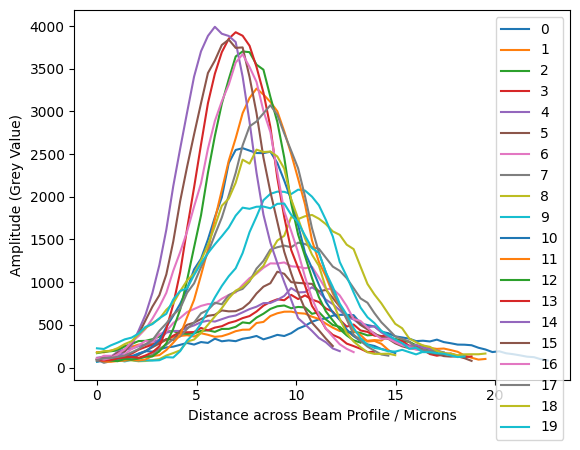

In [4]:
# Define how many data points we have. 'data size'
ds = 20

# Quick plot of raw data
for i in range(ds):
    plt.plot(distances[i+ds], amplitudes[i+ds], label = '{}'.format(i))

plt.legend()

plt.xlabel('Distance across Beam Profile / Microns')
plt.ylabel('Amplitude (Grey Value)')

plt.show()

## Normalise, cut down data

In [5]:
all_distances, all_amps = data_trim(distances, amplitudes, 10000000)

## Errors - for above normalised Gaussians

In [6]:
''' Error on cross sectional distance'''
# Scale says ~4.3055 pixels / microns therefore 0.232 microns / pixel
# so lets set error as 0.2 microns

all_distances_errors = []

for i in range(len(all_distances)):
    all_distances_errors.append(np.ones(np.size(all_distances[i]))*0.2) # takes into account different sized data sets

''' Error on amplitude '''
# Grey value resolution = 1
# But 12 bit image = 2^12 = 4096 available 'colours'
# Say 10% accuracy

all_amps_errors = []

for i in range(len(all_amps)):
    err = 40.96 / np.max(amplitudes[i])
    all_amps_errors.append(np.ones(np.size(all_amps[i]))*err) # takes into account different sized data sets

## Fit Data

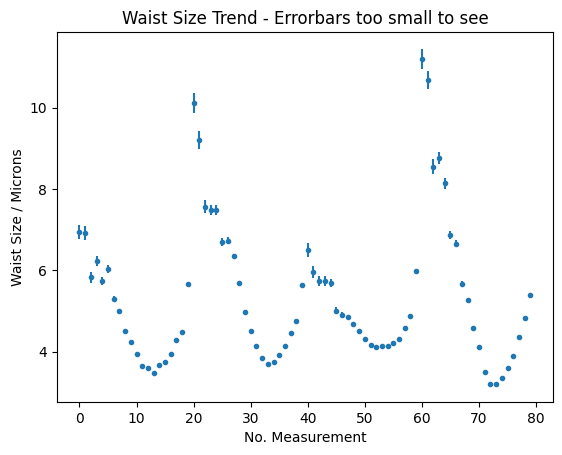

In [7]:
# Create some empty arrays to store values of interest
params_ = np.zeros((len(all_distances),3))
y_fits = [] # NB: this has to be a list due to different sized arrays sitting in it
params_errs_ = np.zeros((len(all_distances),3))
chi_red_array = np.zeros(len(all_distances))

# Populate initial guess array - important to change per data set!!
initial_guesses = np.zeros((len(all_distances),3))
initial_guesses[:,0] = 3
initial_guesses[9,0] = 5
initial_guesses[12,0] = 3
initial_guesses[:,1] = 6
initial_guesses[:,2] = 1
initial_guesses[1,1] = 10
initial_guesses[17,1] = 10
initial_guesses[18,1] = 10
initial_guesses[9,0] = 20
initial_guesses[38,0] = 20
initial_guesses[43,0] = 20
initial_guesses[45,0] = 20
initial_guesses[40,0] = 6
initial_guesses[41,0] = 6
initial_guesses[68,0] = 6
# initial_guesses[58,0] = 20
# initial_guesses[68,0] = 20
# initial_guesses[14:,1] = 50
# initial_guesses[0,0] = 0.2

for i in range(len(all_distances)):
    singlefit, params_[i], params_errs_[i], chi_red_array[i] = fit_labs(all_distances[i],all_amps[i], all_amps_errors[i], Gauss, initial_guesses[i])
    y_fits.append(singlefit)

waists = params_[:,0]
waists_errs = params_errs_[:,0]
# print(waists)
# print(len(waists))
# print(waists_errs)

waists[9] = np.abs(waists[9])

# Plot waist trend 
plt.errorbar(np.arange(len(all_distances)),waists, yerr = waists_errs, linestyle = '', marker = 'o', ms = 3)
plt.xlabel('No. Measurement')
plt.ylabel('Waist Size / Microns')
plt.title('Waist Size Trend - Errorbars too small to see')

for i in range(len(waists)):
    if waists[i] < 0:
        print(i, waists[i])

[10.67187743 10.91185739 96.6186664 ]


Text(0, 0.5, 'Normalised Amplitude')

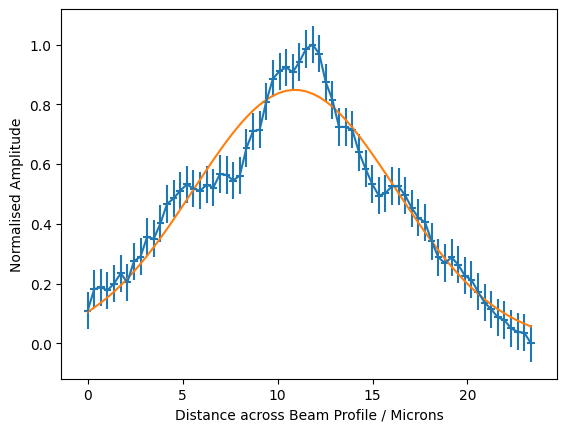

In [8]:
t = 61
plt.errorbar(all_distances[t], all_amps[t], xerr=all_distances_errors[t],yerr=all_amps_errors[t])
plt.plot(all_distances[t],y_fits[t])
print(params_[t])

plt.xlabel('Distance across Beam Profile / Microns')
plt.ylabel('Normalised Amplitude')

In [9]:
''' Split waist fits into vertical and horizontal measurements and take average'''

dl_waists = waists[0:ds]
dr_waists = waists[ds:2*ds]
h_waists = waists[2*ds:3*ds]
v_waists = waists[3*ds:]

dl_waists_errs = waists_errs[0:ds]
dr_waists_errs = waists_errs[ds:2*ds]
h_waists_errs = waists_errs[2*ds:3*ds]
v_waists_errs = waists_errs[3*ds:]

waists_array = np.array([dl_waists, dr_waists, h_waists,v_waists]) 
mean_waists = np.mean(waists_array, axis = 0)
std_waists = np.std(np.array(waists_array), axis = 0) / np.sqrt(np.shape(waists_array)[0])
print(mean_waists, std_waists)

[8.68577542 8.18737089 6.91910359 7.05109426 6.7586193  6.15191061
 5.89479558 5.46070708 5.03603    4.57278342 4.21814984 3.86467496
 3.69348506 3.62374908 3.72650088 3.87116885 4.0733677  4.41851506
 4.73763834 5.67559103] [1.00489577 0.92994356 0.59427413 0.58815974 0.5372257  0.36569026
 0.40493186 0.29804441 0.23817275 0.13116545 0.10553387 0.14809294
 0.16662318 0.17196829 0.14156926 0.11221114 0.08561066 0.05577002
 0.07600212 0.10334789]


## Calculating Z values and Plotting Waist size against Z

In [10]:
# Define Global Path for where 'z' values are stored
z_path = "C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Red-Data/zs.csv"

# Import as dataframe
df_lengths = pd.read_csv(z_path)

# Convert to array. Called 'lengths' as this isnt the z values yet
lengths = np.array(df_lengths['zs'])

# Take error as confocal z stack resolution ie 0.1
lengths_errs = np.ones(len(lengths))*0.1

In [11]:
print(lengths)
print(len(lengths))

[20.8 19.2 17.6 16.  14.4 12.8 11.2  9.6  8.   6.4  4.8  3.2  1.6  0.
 -1.6 -3.2 -4.8 -6.4 -8.  -9.6]
20


This 'lengths' value MIGHT need to be multiplied by cos theta? Where theta is angle of elevation of the fibre... but won't do this yet.

## Fit Waists vs Z

In [12]:
# Need wavelength of light to calc. Rayleigh Range (in microns)
wavelength = 0.635
wavelength_err = 0.005 # according to online spec (THORLABS CPS405)

Angle of elevation

<ErrorbarContainer object of 3 artists>

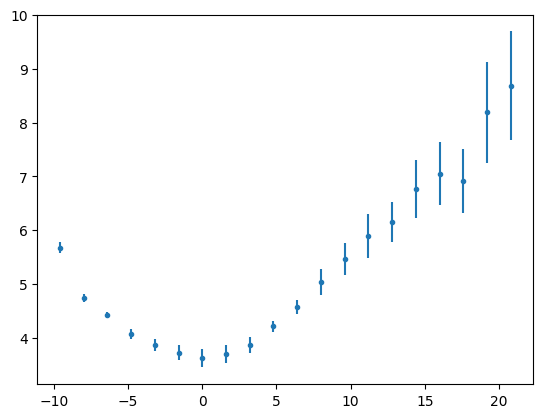

In [13]:
# online protractor at https://www.ginifab.com/feeds/angle_measurement/ 
# NB: see image 'C:\Users\abiga\OneDrive - Durham University\1. Fourth Year\1. Project\1. Data Analysis\Christmas Report\Cleaved-2\Cleaved - fibre- pics\cleaved_elev_angle'

# A plot of waists vs z
plt.errorbar(lengths, mean_waists, yerr = std_waists, linestyle = '', marker = 'o', ms = 3)


Fit

In [14]:
waist_fit1, params1, params_errs1, chisqu_WvsZ1 = fit_labs(lengths, mean_waists, std_waists, WvsZ, np.array([5,1,2]))
w01, z01,RR1= params1
w0_err1, z0_err1,RR_err1 = params_errs1

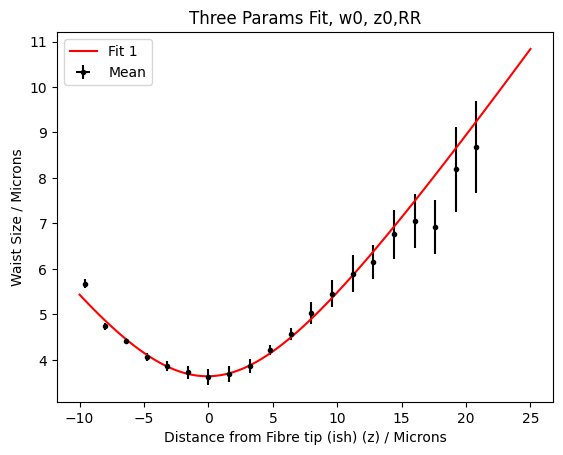

In [15]:
# Plot waists vs Z:
plt.errorbar(lengths, mean_waists, xerr = lengths_errs, yerr = std_waists, linestyle = '', marker = 'o', ms = 3, color = 'k',label = 'Mean')
#plt.errorbar(lengths[10:], mean_waists[10:], xerr = lengths_errs[10:], yerr = std_waists[10:], linestyle = '', marker = 'o', ms = 3, color = 'r',label = 'Outliers')
plt.plot(np.linspace(-10,25,100), WvsZ(np.linspace(-10,25,100), w01, z01,RR1), color = 'red', label = 'Fit 1')

# plt.errorbar(lengths, h_waists, yerr = h_waists_errs, linestyle = '', marker = 'o', ms = 3, label = 'Horizontal')
# plt.errorbar(lengths, dl_waists, yerr = dl_waists_errs, linestyle = '', marker = 'o', ms = 3, label = 'L Diagonal')
# plt.errorbar(lengths, dr_waists, yerr = dr_waists_errs, linestyle = '', marker = 'o', ms = 3, label = 'R Diagonal')
# plt.errorbar(lengths, v_waists, yerr = v_waists_errs, linestyle = '', marker = 'o', ms = 3, label = 'Vertical')

plt.xlabel('Distance from Fibre tip (ish) (z) / Microns')
plt.ylabel('Waist Size / Microns')
plt.title('Three Params Fit, w0, z0,RR')
plt.legend()

In [16]:
print('The minimum waist is {} pm {}'.format(w01, w0_err1))
print('The distance from the fibre tip to the minimum waist is {} pm {}'.format(z01, z0_err1))
print('The Rayleigh Range is {} pm {}.'.format(RR1,RR_err1))
print('The reduced chi squared value of this fit is {}'.format(chisqu_WvsZ1))

The minimum waist is 3.642151437229143 pm 0.05540220536415263
The distance from the fibre tip to the minimum waist is -0.08309064282320086 pm 0.1529693740778496
The Rayleigh Range is 8.950738834112796 pm 0.3507116672099024.
The reduced chi squared value of this fit is 1.3020925907709455


In [17]:
print('The wavelength check in nanometres is {} nm'.format(wavelength_check(w01,RR1)))
print('This is approx. {}x the actual wavelength'.format( wavelength_check(w01,RR1) / (wavelength*10**3)))

The wavelength check in nanometres is 4655.935830056459 nm
This is approx. 7.33218240953773x the actual wavelength


## Comparison to Experiment - Ray Optics Model

Find k0 and define constants 

In [18]:
# Defining Parameters of set-up
# info about fibre from 35m cable:
''' https://www.thorlabs.com/drawings/b4627de8c1f781cd-1251149A-D70E-815D-5BD8491D7FDA5B7B/PM1550-HP-SpecSheet.pdf '''

NA = 0.14 # numerical aperture 
NA_err = 0.01

k0 = find_k(wavelength)
k0_err = np.abs(find_k(wavelength+wavelength_err) - k0)
print(k0, k0_err)

a = 9.2e-6 / 2 # core radius, in metres 
a_err = 0.1e-6 / 2 

9894780.011306435 77302.96883833222


## Extra for Tapered Fibre - what is the predicted minimum waist after the taper?

In [19]:
end_taper = 26 ## End taper diameter (caldding) for fibre
end_taper_err = np.sqrt(2*0.1) ## Precision added in quadrature

clad_diam = 124.6 # Diameter of cladding of 35m stretch of fibrecore fibre
cald_diam_err = 0.1

NA_taper_ = NA_taper(clad_diam, end_taper, NA)

# Error on NA_taper
cderr = np.abs(NA_taper(clad_diam+cald_diam_err, end_taper, NA) - NA_taper_)
eterr = np.abs(NA_taper(clad_diam, end_taper+end_taper_err, NA) - NA_taper_)
naerr = np.abs(NA_taper(clad_diam, end_taper, NA+NA_err) - NA_taper_)

NA_taper_err = np.sqrt(cderr**2 + eterr**2 + naerr**2)

print('The NA of the tapered fibre end is {} pm {}'.format(NA_taper_,NA_taper_err))

The NA of the tapered fibre end is 0.02921348314606742 pm 0.002146453967189703


Find new a assuming it has decreased in same adiabatic fashion as NA

In [20]:
a_taper = new_a(a,NA,NA_taper_)

#Errors
a_alpha = np.abs(new_a(a+a_err,NA,NA_taper_) - a_taper)
na_alpha = np.abs(new_a(a,NA+NA_err,NA_taper_) - a_taper)
na_tap_alpha = np.abs(new_a(a,NA,NA_taper_+NA_taper_err) - a_taper)

a_taper_err = np.sqrt(a_alpha**2 + na_alpha**2 + na_tap_alpha**2)

print('The new core radius of the tapered fibre is {} pm {}'.format(a_taper,a_taper_err))

The new core radius of the tapered fibre is 9.598715890850723e-07 pm 9.580044440817044e-08


In [21]:
print(NA_taper_)

0.02921348314606742


Find V_no of tapered fibre and its error

In [22]:
V_no = V_number(NA_taper_, k0, a_taper)

EC_NA = np.abs(V_number(NA_taper_+NA_taper_err, k0, a_taper) - V_no)
EC_k0 = np.abs(V_number(NA_taper_, k0+k0_err, a_taper)- V_no)
EC_a = np.abs(V_number(NA_taper_, k0, a_taper+a_taper_err) - V_no)

V_no_err = np.sqrt(EC_NA**2 + EC_k0**2 + EC_a**2)

In [23]:
print('The predicted V no is {} pm {}'.format(V_no, V_no_err))

The predicted V no is 0.277461430944492 pm 0.034455203420838625


Using the Marcuse relation to compute theoretical minimum waist from V number and core radius

In [24]:
w0_theory = marcuse(V_no,a)

# error on w0
cont_V_no = np.abs(marcuse(V_no+V_no_err,a) - w0_theory)
cont_a = np.abs(marcuse(V_no,a+a_err) - w0_theory)

w0_theory_err = np.sqrt(cont_V_no**2 + cont_a**2)

In [25]:
print('The predicted minimum waist using the ray optics model is {} pm {} microns'.format(w0_theory,w0_theory_err))

The predicted minimum waist using the ray optics model is 29079.71774786773 pm 14657.074255486705 microns


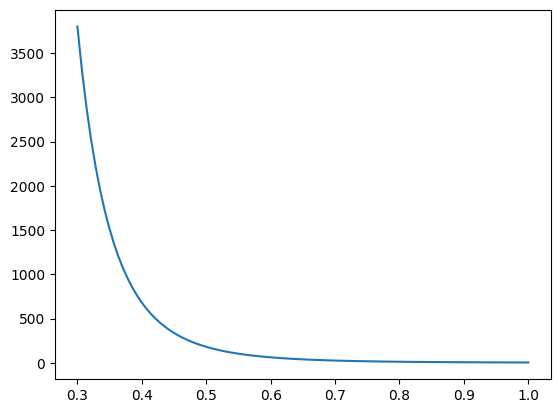

In [26]:
xs = np.linspace(0.3,1,100)
plt.plot(xs,marcuse(xs,a_taper))